In [1]:
from astropy import units as u
# %matplotlib inline
import matplotlib.pyplot as plt
from gammapy.estimators import FluxPoints
from gammapy.datasets import Datasets, FluxPointsDataset
from gammapy.modeling import Fit
from gammapy.modeling.models import ExpCutoffPowerLawSpectralModel, Models, SkyModel, PowerLawSpectralModel
from uncertainties import unumpy
import numpy as np
import math

In [2]:

test_folder = '3PC_SEDs/'
test_pulsar = 'J0540-6919.ecsv'
test_file   = test_folder + test_pulsar

test_fp = FluxPoints.read(test_file)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


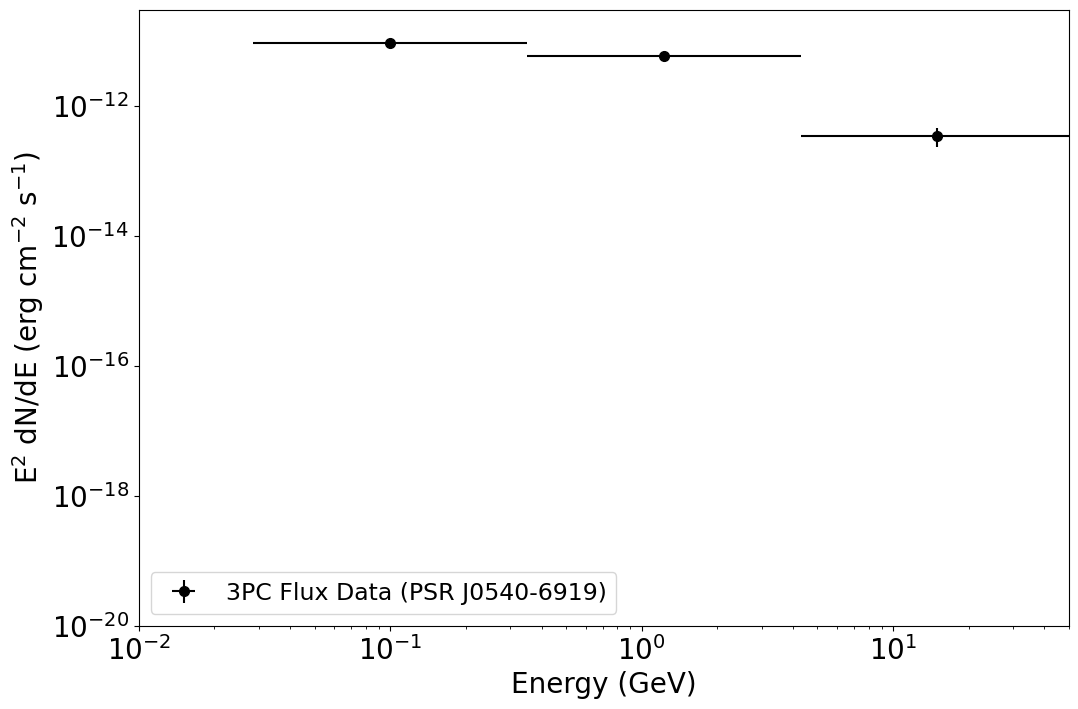

In [3]:

fontsize = 20
plt.figure(figsize=(12, 8))
test_fp.plot(color='black', marker='o', markersize=7, label='3PC Flux Data (PSR J0540-6919)')
plt.ylim([1e-20, 3e-11])
plt.xlim([0.01, 50])
plt.ylabel("E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)",fontsize=fontsize)
plt.xlabel("Energy (GeV)",fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize-3)

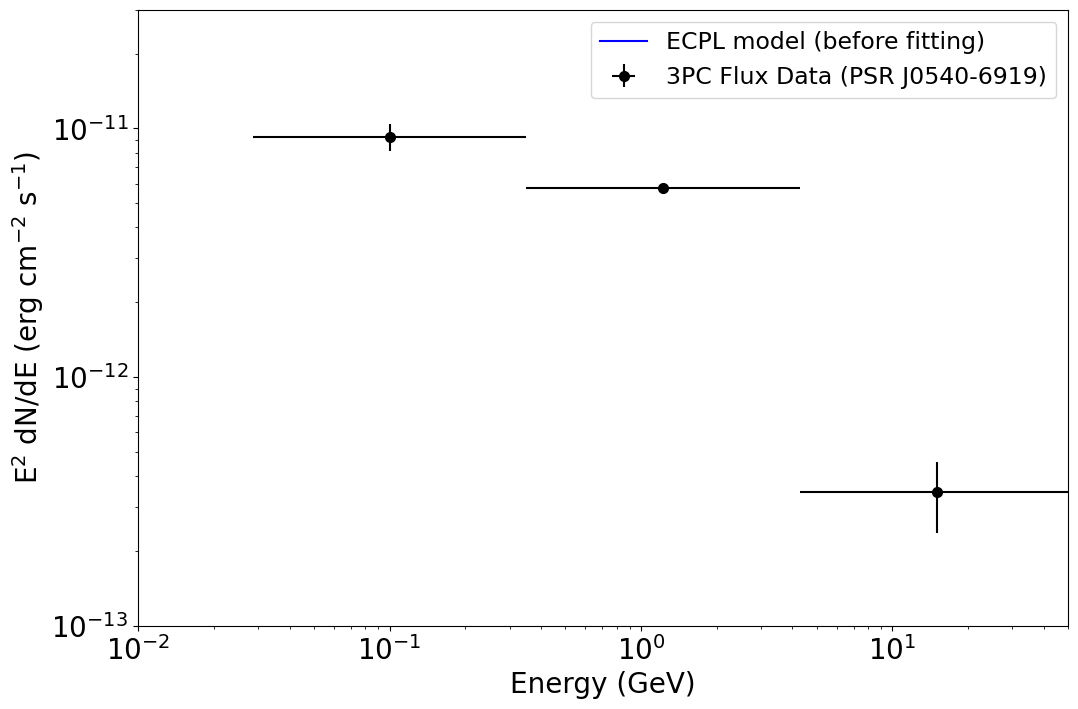

In [4]:

model_ecpl = ExpCutoffPowerLawSpectralModel(amplitude=1e-12 * u.Unit("cm-2 s-1 GeV-1"), index=1.8, 
                                       lambda_=0.1 * u.Unit("GeV-1"), reference=1.0 * u.GeV, alpha=1.0)


fontsize = 20
plt.figure(figsize=(12, 8))
test_fp.plot(color='black', marker='o', markersize=7, label='3PC Flux Data (PSR J0540-6919)')

energy_bounds = [0.07, 20] * u.GeV
kwargs = {"sed_type": "e2dnde"}
model_ecpl.plot(energy_bounds=energy_bounds, color="blue", label='ECPL model (before fitting) ', **kwargs)

plt.ylim([1e-13, 3e-11])
plt.xlim([0.01, 50])
plt.ylabel("E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)",fontsize=fontsize)
plt.xlabel("Energy (GeV)",fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize-3)

In [5]:

fit_model = SkyModel(spectral_model=model_ecpl)


minuit_opts = {"tol": 0.001, "strategy": 2}


dataset_ecpl = FluxPointsDataset(fit_model, test_fp)


fitter_ecpl = Fit()
fitter_ecpl.optimize_opts = minuit_opts

result_ecpl = fitter_ecpl.run([dataset_ecpl])
result_ecpl = fitter_ecpl.run([dataset_ecpl])
result_ecpl = fitter_ecpl.run([dataset_ecpl])


print(result_ecpl.success)
print(dataset_ecpl)

C:\Users\G3 15\anaconda3\envs\gammapy_env\lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\G3 15\anaconda3\envs\gammapy_env\lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\G3 15\anaconda3\envs\gammapy_env\lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\G3 15\anaconda3\envs\gammapy_env\lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\G3 15\anaconda3\envs\gammapy_env\lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__arra

True
FluxPointsDataset
-----------------

  Name                            : 3a3-jz78 

  Number of total flux points     : 3 
  Number of fit bins              : 3 

  Fit statistic type              : chi2
  Fit statistic value (-2 log(L)) : 0.00

  Number of models                : 1 
  Number of parameters            : 5
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : OvrsFOQ7
    Datasets names            : None
    Spectral model type       : ExpCutoffPowerLawSpectralModel
    Spatial  model type       : 
    Temporal model type       : 
    Parameters:
      index                         :      2.107   +/-    0.06             
      amplitude                     :   4.61e-09   +/- 2.8e-10 1 / (GeV s cm2)
      reference             (frozen):      1.000       GeV         
      lambda_                       :      0.185   +/-    0.03 1 / GeV     
      alpha                 (frozen):      1.000                   
  
  


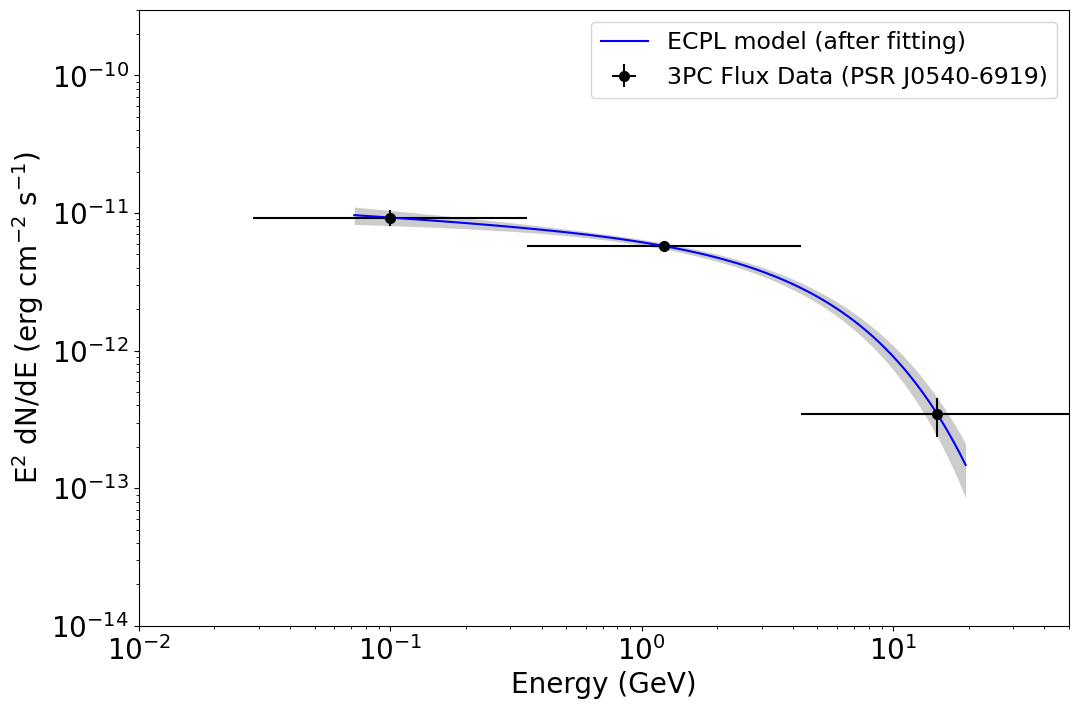

In [13]:

fontsize = 20
plt.figure(figsize=(12, 8))
test_fp.plot(color='black', marker='o', markersize=7, label='3PC Flux Data (PSR J0540-6919)')

energy_bounds = [0.07, 20] * u.GeV
kwargs = {"sed_type": "e2dnde"}
model_ecpl.plot(energy_bounds=energy_bounds, color="blue", label='ECPL model (after fitting) ', **kwargs)
model_ecpl.plot_error(energy_bounds=energy_bounds,color="gray", **kwargs)

plt.ylim([1e-14, 3e-10])
plt.xlim([0.01, 50])
plt.ylabel("E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)",fontsize=fontsize)
plt.xlabel("Energy (GeV)",fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize-3)

In [14]:


lambda_val = unumpy.uarray(model_ecpl.parameters["lambda_"].value,model_ecpl.parameters["lambda_"].error)
cutoff_val = np.divide(1,lambda_val)
print('E_Cutoff = ',cutoff_val, 'GeV')
cutoff_val


E_Cutoff =  5.4+/-0.8 GeV


5.409314099541606+/-0.8189549174978215

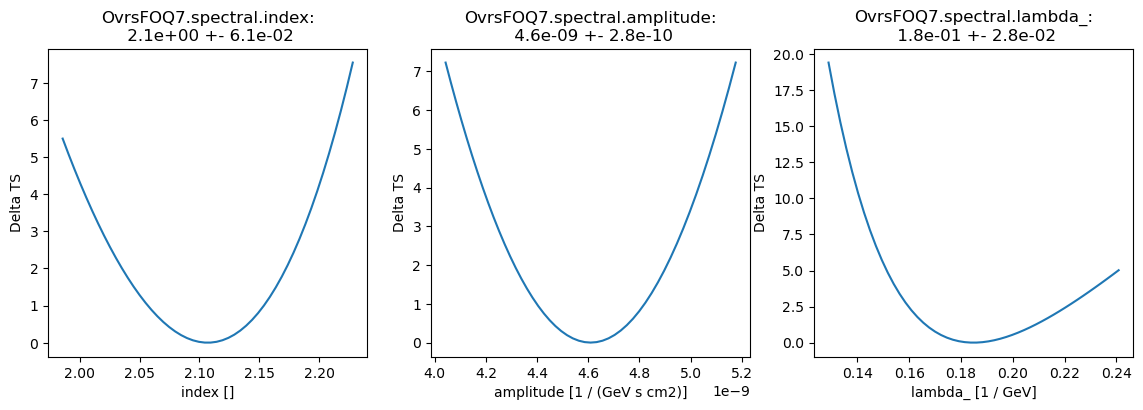

In [15]:


total_stat = result_ecpl.total_stat

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

for ax, par in zip(axes, model_ecpl.parameters.free_parameters):
    par.scan_n_values = 50
    idx = model_ecpl.parameters.index(par)
    name = dataset_ecpl.models.parameters_unique_names[idx]
    profile = fitter_ecpl.stat_profile(datasets=dataset_ecpl, parameter=par)
    ax.plot(profile[f"{name}_scan"], profile["stat_scan"] - total_stat)
    ax.set_xlabel(f"{par.name} [{par.unit}]")
    ax.set_ylabel("Delta TS")
    ax.set_title(f"{name}:\n {par.value:.1e} +- {par.error:.1e}")
    


In [16]:


model_pl = PowerLawSpectralModel(index=2.0, amplitude=1e-8 * u.Unit("cm-2 s-1 GeV-1"), reference=1.0 * u.GeV)
fit_model_pl = SkyModel(spectral_model=model_pl)

minuit_opts = {"tol": 0.001, "strategy": 2}
dataset_pl = FluxPointsDataset(fit_model_pl, test_fp)

fitter_pl = Fit()
fitter_pl.optimize_opts = minuit_opts
result_pl = fitter_pl.run([dataset_pl])
result_pl = fitter_pl.run([dataset_pl])
result_pl = fitter_pl.run([dataset_pl])

print(result_pl.success)
print(dataset_pl)

C:\Users\G3 15\anaconda3\envs\gammapy_env\lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


True
FluxPointsDataset
-----------------

  Name                            : gMLLgL28 

  Number of total flux points     : 3 
  Number of fit bins              : 3 

  Fit statistic type              : chi2
  Fit statistic value (-2 log(L)) : 101.66

  Number of models                : 1 
  Number of parameters            : 3
  Number of free parameters       : 2

  Component 0: SkyModel
  
    Name                      : kM-95ksm
    Datasets names            : None
    Spectral model type       : PowerLawSpectralModel
    Spatial  model type       : 
    Temporal model type       : 
    Parameters:
      index                         :      2.537   +/-    0.02             
      amplitude                     :   2.52e-09   +/- 1.3e-10 1 / (GeV s cm2)
      reference             (frozen):      1.000       GeV         
  
  


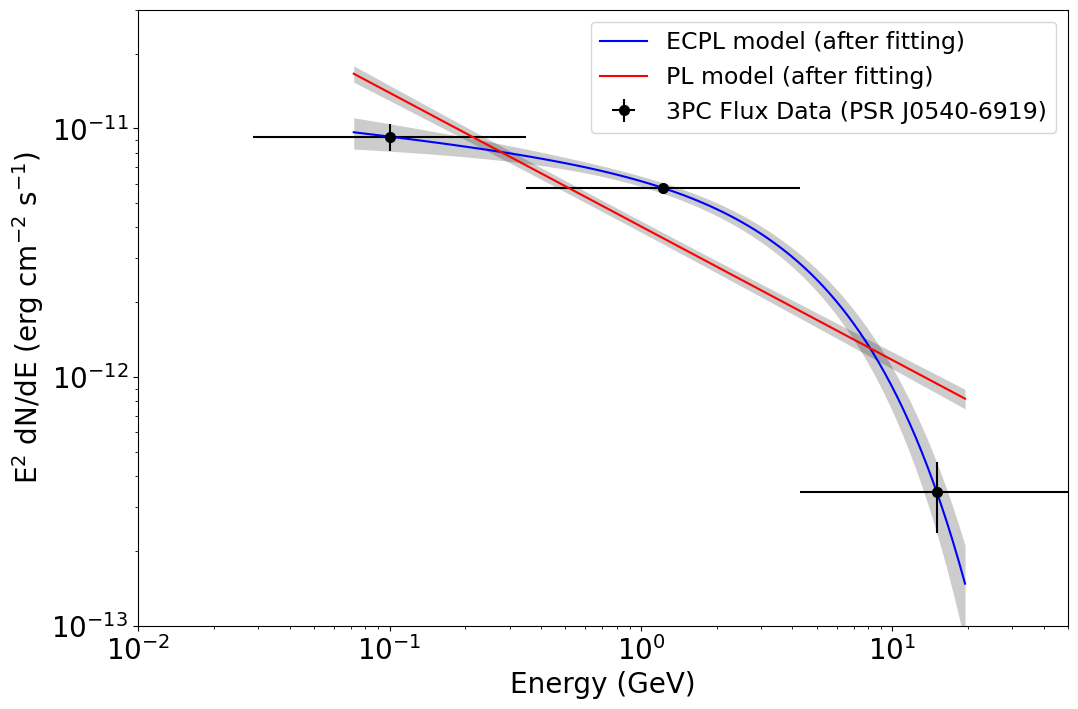

In [17]:


fontsize = 20
plt.figure(figsize=(12, 8))
test_fp.plot(color='black', marker='o', markersize=7, label='3PC Flux Data (PSR J0540-6919)')

energy_bounds = [0.07, 20] * u.GeV
kwargs = {"sed_type": "e2dnde"}
model_ecpl.plot(energy_bounds=energy_bounds, color="blue", label='ECPL model (after fitting) ', **kwargs)
model_ecpl.plot_error(energy_bounds=energy_bounds,color="gray", **kwargs)

model_pl.plot(energy_bounds=energy_bounds, color="red", label='PL model (after fitting) ', **kwargs)
model_pl.plot_error(energy_bounds=energy_bounds,color="gray", **kwargs)

plt.ylim([1e-13, 3e-11])
plt.xlim([0.01, 50])
plt.ylabel("E$^{2}$ dN/dE (erg cm$^{-2}$ s$^{-1}$)",fontsize=fontsize)
plt.xlabel("Energy (GeV)",fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize-3)

In [18]:


TS = result_pl.total_stat - result_ecpl.total_stat
print('Test statistic between PL and ECPL : ', TS)


sigma_improvement = math.sqrt(TS)
print('Improvement signficance of ECPL w.r.t. PL : ',sigma_improvement)



Test statistic between PL and ECPL :  101.65810283421852
Improvement signficance of ECPL w.r.t. PL :  10.082564298541246
